In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from MinorityGameComplex import GameSimulationImitationTermalGraphs

In [2]:
dynamic_times = np.logspace(0,4.3,11).astype(int)

In [3]:
dynamic_times

array([    1,     2,     7,    19,    52,   141,   380,  1023,  2754,
        7413, 19952])

In [4]:
S=2
M=10
N=381
net=0 #RANDOM NETWORK
grado=10
p=None

Ncop=380
dynT=2500
T=10000000
ponderas = 1
imprime = 1
print('alpha={:.4f}'.format(2**M/N))
meangains=np.zeros(T)
meangainimi=np.zeros(T)
for i in range(ponderas):
    A, G, GC = GameSimulationImitationTermalGraphs(S, M, N, Ncop, T, dynT, net, grado, p)
    for t in range(T):
        if t<10000:
            meangains[t] += np.mean(G[:(t+1)])
            meangainimi[t] += np.mean(GC[:(t+1)])
        else:
            meangains[t] += np.mean(G[(t-9999):t])
            meangainimi[t] += np.mean(GC[(t-9999):t])
    if (i+1)%imprime==0:
        print(' - Pondera nº{}/{}'.format(i+1,ponderas))
        print('          <g(T)> = {}'.format(meangains[-1]/(i+1)))
        print('        <g_I(T)> = {}'.format(meangainimi[-1]/(i+1)))
meangains = meangains/ponderas
meangainimi = meangainimi/ponderas

alpha=2.6877
 - Pondera nº1/1
          <g(T)> = -381.0
        <g_I(T)> = -381.0


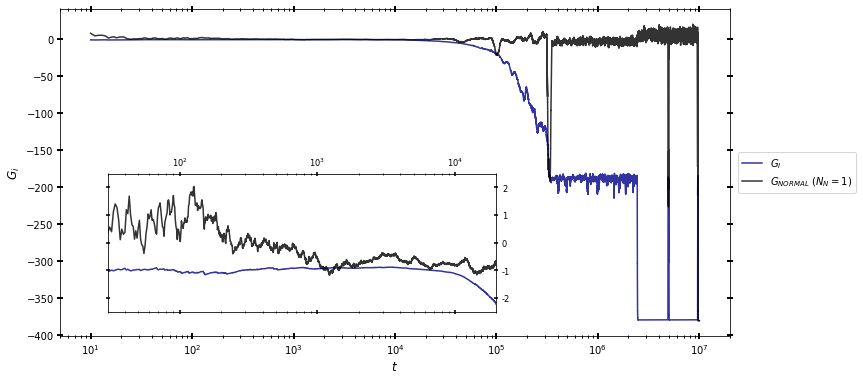

In [10]:
fig, ax = plt.subplots(1, figsize=(12,6))

ax.set_xscale('log')
ax.set_xlabel(r'$t$', fontsize='large')
ax.set_ylabel(r'$G_i$', fontsize='large')

ax.tick_params(which='minor', direction = 'inout', length=3, width=1,
              labelbottom=False, labeltop=False, labelleft=False, labelright=False,
                  bottom=True, top=True, left=True, right=True)
ax.tick_params(which='major', direction = 'inout', length=6, width = 2,
                  labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                  bottom=True, top=True, left=True, right=True)

cols = ['dodgerblue', 'yellowgreen', 'crimson', 'darkblue', 'cyan', 'darkblue']
lin12, = ax.plot(np.arange(10,T-1), meangainimi[10:-1], lw=1.5, ls = '-', color = cols[3], alpha=.8)
lin101, = ax.plot(np.arange(10,T-1), meangains[10:-1], lw=1.5, ls = '-', color = 'k', alpha=.8)

"""xticks1 = [0.1, 1, 10]
ax.set_xticks(xticks1)
ax.set_xticklabels([str(i) for i in xticks1])"""

#ax.axhline(y=0, xmin=0, xmax=1, color='k', alpha=0.7, linestyle='--')
#for i in range(int(T/dynT)-1):
#    ax.axvline(x=dynT*(i+1), linestyle='--', lw=.5, color='k', alpha=.5)

labels = [r'$G_{I}$', r'$G_{NORMAL}$ $(N_N = 1)$']
ax.legend([(lin12,), (lin101,) ], labels, loc='center', bbox_to_anchor=[1.1,0.5])


axin = fig.add_axes([0.18, 0.18, 0.45, 0.32])
axin.set(xscale='log')

axin.tick_params(which='minor', direction = 'inout', length=2, width=0.8,
              labelbottom=False, labeltop=True, labelleft=False, labelright=False,
                  bottom=True, top=True, left=True, right=True)
axin.tick_params(which='major', direction = 'inout', length=4, width = 1.6,
                  labelbottom=False, labeltop=True, labelleft=False, labelright=True,
                  bottom=True, top=True, left=True, right=True)

lin1, = axin.plot(np.arange(10,len(meangainimi[10:100000])+10), meangainimi[10:100000], lw=1.5, ls = '-', 
                 color = cols[3], alpha=.8)
lin2, = axin.plot(np.arange(10,len(meangainimi[10:100000])+10), meangains[10:100000], lw=1.5, ls = '-', 
                  color = 'k', alpha=.8)

axin.set_ylim([-2.5, 2.5])
axin.set_xlim([30,20000])

axin.tick_params(axis="x", labelsize='small')
laby = [-2, -1, 0, 1, 2]
axin.set_yticks(laby)
axin.set_yticklabels(['-2','-1','0','1', '2'],
                     fontsize='small')

filename= 'LONGTRANSIENT_random_10<K>_10M_381N_380IMIT_2500dynT.png'
fig.savefig(filename, bbox_inches='tight')